# UPC Quantum Engineering Final Project: Quantum Channel Discrimination

In [12]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit import Aer, execute
from numpy import pi
import numpy as np
import math

## II. One-shot discrimination

### A. Optimal Input

### Setting the options to be parametrized

In [20]:
# Create 2 qbits circuit and 1 output classical bit
qreg_q = QuantumRegister(2, 'q')
creg_c = ClassicalRegister(2, 'c')
creg_c = ClassicalRegister(1, 'c')

# angles shift from first parameter, to the second one, with jumps using the third parameter
angles = np.arange(0, pi/2 + (pi/2/10), pi/2/10)

# Use Aer's qasm_simulator
backend_sim = Aer.get_backend('qasm_simulator')

### Run all circuit instances

In [21]:
totalResults=[]
totalCounts=[]
totalCircuits=[]

print("Starting the execution")
for theta in angles:
    print("Starting to compute the angle: ", math.degrees(theta))
    # Create the circuit gates
    circuit = QuantumCircuit(qreg_q, creg_c)
    circuit.x(qreg_q[0])
    circuit.reset(qreg_q[1])
    circuit.cry(theta, qreg_q[0], qreg_q[1])
    circuit.cx(qreg_q[1], qreg_q[0])
    circuit.measure(qreg_q[0], creg_c[0])
    totalCircuits.append(circuit)
    job_sim = execute(circuit, backend_sim, shots=5000)
    results_sim = job_sim.result()
    totalResults.append(results_sim)
    counts = results_sim.get_counts(circuit)
    print(counts)
    totalCounts.append(counts)

Starting the execution
Starting to compute the angle:  0.0
{'1': 5000}
Starting to compute the angle:  9.0
{'0': 28, '1': 4972}
Starting to compute the angle:  18.0
{'0': 122, '1': 4878}
Starting to compute the angle:  27.0
{'0': 283, '1': 4717}
Starting to compute the angle:  36.0
{'0': 433, '1': 4567}
Starting to compute the angle:  45.0
{'0': 775, '1': 4225}
Starting to compute the angle:  54.0
{'0': 1026, '1': 3974}
Starting to compute the angle:  63.0
{'0': 1372, '1': 3628}
Starting to compute the angle:  72.0
{'0': 1721, '1': 3279}
Starting to compute the angle:  81.0
{'0': 2107, '1': 2893}
Starting to compute the angle:  90.0
{'0': 2535, '1': 2465}


printing the first circuit


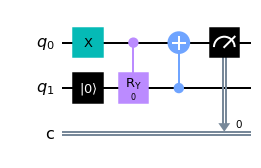

In [15]:
print("printing the first circuit")
totalCircuits[0].draw('mpl')